## GOOGLE PLAYSTORE APPS DATASET

### Although Google Play acts as a digital media store as well, the data covers only mobile applications.
### The Play Store apps data has enormous potential todrive app-making businesses to success.
### Actionableinsights can be drawn for developers to work on andcapture the Android market.
### The app market isgrowing with a dynamic speed and is ever changing.
### The Google Play Store is the largest and most popular Android app store.
### We collected descriptive information on over 3,100 apps across 11 different categories in the Google App Store.
### We focused on the following 11 categories: Business, Food & Drink, Books & Reference, Travel & Local, Health & Fitness,News & Magazines, Education, Social, Finance, Medical, and Entertainment.
### Each app has its own web page where detailed information about the app is available.
### We used Selenium to scrape information about each of these apps for our analysis.
### We scraped app title, category, developer name, whether an app contains ads, rating, number of reviews,app size, number of installs, and price.

## Import Required Libraries

First we will import all the necessary libraries needed for analysis and visualization.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings; warnings.simplefilter('ignore')

Now that we have all the necessary libraries lets load the data set. We will load it into the pandas DataFrame df.

In [3]:
df=pd.read_csv("googleplaystore.csv")

We read the dataset into the DataFrame df and will have a look at the shape , columns , column data types and the first 5 rows of the data. This will give a brief overview of the data at hand.

In [4]:
# This returns the number of rows and columns
df.shape 

(10841, 13)

In [5]:
# This returns the column names
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

## Here’s what we know about the columns:

App : The name of the app
Category : The category of the app
Rating : The rating of the app in the Play Store
Reviews : The number of reviews of the app
Size : The size of the app
Install : The number of installs of the app
Type : The type of the app (Free/Paid).The price of the app (0 if it is Free)
Content Rating :The appropiate target audience of the app
Genres: The genre of the app
Last Updated : The date when the app was last updated
Current Ver : The current version of the app
Android Ver : The minimum Android version required to run the app

In [7]:
#This returns the data type of the columns
df.dtypes 

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [8]:
#This returns the first 5 rows of the Data set
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Thus we get a glimpse of the data set by looking at the first 5 rows returned by df.head(). Optionally we can specify the number of rows to be returned, by sending it as a parameter to the head() function.

In [9]:
# look that the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


By diagnosing the data frame, we know that:

1.There are 13 columns of properties with 10841 rows of data. 
2.Column 'Reviews', 'Size', 'Installs' and 'Price' are in the type of 'object' 
3.Values of column 'Size' are strings representing size in 'M' as Megabytes, 'k' as kilobytes and also 'Varies with devices'. 
4.Values of column 'Installs' are strings representing install amount with symbols such as ',' and '+'. 5.Values of column 'Price' are strings representing price with symbol '$'.

Hence, we will need to do some data cleaning.

## Lets look at the numerical columns :

In [10]:
print(df.count())

App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Genres            10841
Last Updated      10841
Current Ver       10833
Android Ver       10838
dtype: int64


Let us finally check for a statistical summary of our dataset.
Note that this function can provide statistics for numerical features only.

In [11]:
# This returns a statistical summary of the numerical columns
df.describe().apply(lambda s:s.apply('{0:.2f}'.format)) 

,Rating
count,9367.00
mean,4.19
std,0.54
min,1.00
25%,4.00
50%,4.30
75%,4.50
max,19.00


## DATA CLEANING

In [12]:
# 1) clean the 'Reviews' data and change the type 'object' to 'float'
reviews = [i for i in df['Reviews']]

def clean_reviews(reviews_list):
    """
    As 'M' has been found the in reviews data, this function
    replace it with million
    """
    cleaned_data = []
    for review in reviews_list:
        if 'M' in review:
            review = review.replace('M', '')
            review = float(review) * 1000000  # 1M = 1,000,000
        cleaned_data.append(review)
    return cleaned_data
df['Reviews'] = clean_reviews(reviews)
df['Reviews'] = df['Reviews'].astype(float)

In [13]:
# 2) clean the 'Size' data and change the type 'object' to 'float'

# found value with '1,000+' in one of record, remove it from data_frame as uncertain whether it is 'M' or 'k'
index = df[df['Size'] == '1,000+'].index
df.drop(axis=0, inplace=True, index=index)

sizes = [i for i in df['Size']]

def clean_sizes(sizes_list):
    """
    As sizes are represented in 'M' and 'k', we remove 'M'
    and convert 'k'/kilobytes into megabytes
    """
    cleaned_data = []
    for size in sizes_list:
        if 'M' in size:
            size = size.replace('M', '')
            size = float(size)
        elif 'k' in size:
            size = size.replace('k', '')
            size = float(size)
            size = size/1024  # 1 megabyte = 1024 kilobytes
        # representing 'Varies with device' with value 0
        elif 'Varies with device' in size:
            size = float(0)
        cleaned_data.append(size)
    return cleaned_data

df['Size'] = clean_sizes(sizes)
df['Size'] = df['Size'].astype(float)

In [14]:
# 3) clean the 'Installs' data and change the type 'object' to 'float'
installs = [i for i in df['Installs']]

def clean_installs(installs_list):
    cleaned_data = []
    for install in installs_list:
        if ',' in install:
            install = install.replace(',', '')
        if '+' in install:
            install = install.replace('+', '')
        install = int(install)
        cleaned_data.append(install)
    return cleaned_data
        
df['Installs'] = clean_installs(installs)
df['Installs'] = df['Installs'].astype(float)

In [15]:
# 4) clean the 'Price' data and change the type 'object' to 'float'
prices = [i for i in df['Price']]

def clean_prices(prices_list):
    cleaned_data = []
    for price in prices_list:
        if '$' in price:
            price = price.replace('$', '')
        cleaned_data.append(price)
    return cleaned_data

df['Price'] = clean_prices(prices)
df['Price'] = df['Price'].astype(float)

In [16]:
# look at the random 10 records in the apps dataframe to verify the cleaned columns
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2596,"SayHi Chat, Meet New People",SOCIAL,4.2,423105.0,0.0,10000000.0,Free,0.0,Mature 17+,Social,"July 9, 2018",Varies with device,Varies with device
3770,The Washington Post Classic,NEWS_AND_MAGAZINES,4.5,23158.0,0.0,1000000.0,Free,0.0,Everyone 10+,News & Magazines,"July 17, 2018",Varies with device,Varies with device
299,GANMA! - All original stories free of charge f...,COMICS,4.7,57106.0,27.0,1000000.0,Free,0.0,Teen,Comics,"July 23, 2018",2.11.3,4.1 and up
5150,Bee'ah Employee App,COMMUNICATION,4.0,4.0,5.4,100.0,Free,0.0,Teen,Communication,"December 24, 2017",2.26.5.0,5.0 and up
2060,Rhythm Patrol,FAMILY,4.3,4207.0,26.0,100000.0,Free,0.0,Everyone,Music;Music & Video,"July 23, 2018",2.180723,4.1 and up
3029,"GolfNow: Tee Time Deals at Golf Courses, Golf GPS",SPORTS,4.5,26102.0,0.0,1000000.0,Free,0.0,Everyone,Sports,"May 3, 2018",Varies with device,Varies with device
3456,Chrome Beta,PRODUCTIVITY,4.4,228794.0,0.0,10000000.0,Free,0.0,Everyone,Productivity,"August 6, 2018",68.0.3440.91,Varies with device
2768,Etsy: Handmade & Vintage Goods,SHOPPING,4.3,95520.0,15.0,10000000.0,Free,0.0,Teen,Shopping,"August 3, 2018",5.3.1,4.1 and up
431,Viber Messenger,COMMUNICATION,4.3,11334973.0,0.0,500000000.0,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
7367,"Startupticker.ch News, Events",NEWS_AND_MAGAZINES,5.0,4.0,10.0,100.0,Free,0.0,Everyone,News & Magazines,"July 23, 2018",2.0.0,4.4 and up


## Let us see if there are any null values in our dataset.

In [17]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

Here, we realized that there are 1474 rows having null values under column 'Rating'. Hence, we decided to replace the null values with median of overall 'Rating' values.

In [19]:
def replace_with_median(series):
    """
    Given a series, replace the rows with null values 
    with median values
    """
    return series.fillna(series.median())

df['Rating'] = df['Rating'].transform(replace_with_median)
df['Rating'] = df['Rating'].astype(float)

In [21]:
# remove the record where 'Type' is having null value
index = df[df['Type'].isna()].index
df.drop(axis=0, inplace=True, index=index)

In [22]:
# check on null values
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [23]:
# grouping the data starting with App and Reviews
df = df.groupby(['App', 'Reviews', 'Category', 'Rating', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 
                           'Last Updated', 'Current Ver', 'Android Ver'], as_index=False)
# reassign Installs values with their mean
df = df['Installs'].mean()
# sort the dataframe by Reviews descendingly
df.sort_values(by='Reviews', ascending=False, inplace=True)
# drop duplicate rows based on App 
df.drop_duplicates(subset=['App'], inplace=True)
df

,App,Reviews,Category,Rating,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs
4534,Facebook,78158306.0,SOCIAL,4.1,0.0,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,1.000000e+09
9661,WhatsApp Messenger,69119316.0,COMMUNICATION,4.4,0.0,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1.000000e+09
5731,Instagram,66577446.0,SOCIAL,4.5,0.0,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,1.000000e+09
6546,Messenger – Text and Video Chat for Free,56646578.0,COMMUNICATION,4.0,0.0,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,1.000000e+09
2701,Clash of Clans,44893888.0,GAME,4.6,98.0,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up,1.000000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4372,FG Autumn Photo Puzzle,0.0,FAMILY,4.3,4.6,Free,0.0,Everyone,Puzzle,"August 23, 2017",1.0,4.0 and up,1.000000e+01
4369,FE Other Disciplines Engineering Exam Prep,0.0,FAMILY,4.3,21.0,Free,0.0,Everyone,Education,"July 27, 2018",5.33.3669,5.0 and up,1.000000e+02
9033,Thyroid Nodules,0.0,MEDICAL,4.3,20.0,Free,0.0,Everyone,Medical,"July 14, 2018",1.0,4.3 and up,1.000000e+01
185,ACCEPT CE MARKING,0.0,PRODUCTIVITY,4.3,30.0,Free,0.0,Everyone,Productivity,"June 28, 2018",1.0,4.1 and up,1.000000e+01


In [24]:
df.isna().sum()

App               0
Reviews           0
Category          0
Rating            0
Size              0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
Installs          0
dtype: int64

Now there are no null values in the dataset.

In [25]:
df.describe()

,Reviews,Rating,Size,Price,Installs
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9.648000e+03
mean,2.170487e+05,4.192485,17.820208,1.098122,7.806898e+06
std,1.832460e+06,0.496210,21.503151,16.861193,5.379975e+07
min,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00
25%,2.500000e+01,4.000000,2.900000,0.000000,1.000000e+03
50%,9.745000e+02,4.300000,9.200000,0.000000,1.000000e+05
75%,2.949750e+04,4.500000,25.000000,0.000000,1.000000e+06
max,7.815831e+07,5.000000,100.000000,400.000000,1.000000e+09


## Let us check for unique values of all columns.

In [26]:
df['Category'].unique()

array(['SOCIAL', 'COMMUNICATION', 'GAME', 'TOOLS', 'VIDEO_PLAYERS',
       'NEWS_AND_MAGAZINES', 'PHOTOGRAPHY', 'FAMILY', 'TRAVEL_AND_LOCAL',
       'PERSONALIZATION', 'MAPS_AND_NAVIGATION', 'SHOPPING',
       'ENTERTAINMENT', 'PRODUCTIVITY', 'HEALTH_AND_FITNESS', 'SPORTS',
       'BOOKS_AND_REFERENCE', 'LIFESTYLE', 'WEATHER', 'FINANCE',
       'BUSINESS', 'EDUCATION', 'FOOD_AND_DRINK', 'COMICS', 'PARENTING',
       'DATING', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'ART_AND_DESIGN',
       'AUTO_AND_VEHICLES', 'MEDICAL', 'BEAUTY', 'EVENTS'], dtype=object)

In [27]:
# type of Type
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [28]:
# type of Content Rating
df['Content Rating'].unique()

array(['Teen', 'Everyone', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

## Method of dropping outliers from the visualised boxplot:
Sometimes a dataset can contain extreme values that are outside the range of what is expected and unlike the other data. These are called outliers and often machine learning modelling and model skill in general can be improved by understanding and even dropping these outlier values. This does not mean that the values identified are outliers and should be removed.

## Detecting The Position of Outliers

In [39]:
print(np.where(df['Reviews']>0))

(array([   0,    1,    2, ..., 9054, 9055, 9056], dtype=int64),)


In [60]:
df.columns

Index(['App', 'Reviews', 'Category', 'Rating', 'Size', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Installs'],
      dtype='object')

## Inter Quartile Range(IQR) Method

In [73]:
# data.quantile(0.25) gives the 25th percentile of a column
# data.quantile(0.75) gives the 75th percentile of a column
Q1=df['Rating'].quantile(0.25)                  
Q3=df['Rating'].quantile(0.75)                  
Q1,Q3

(4.0, 4.5)

In [77]:
upper = df['Rating'] >=(Q3+1.5*IQR)
print("Upper bound:",upper)
print(np.where(upper))
lower = df['Rating'] <= (Q1-1.5*IQR)
print("Lower bound:",lower)
print(np.where(lower))

Upper bound: 4534    False
9661    False
5731    False
6546    False
2701    False
        ...  
4372    False
4369    False
9033    False
185     False
5862    False
Name: Rating, Length: 9648, dtype: bool
(array([], dtype=int64),)
Lower bound: 4534    False
9661    False
5731    False
6546    False
2701    False
        ...  
4372    False
4369    False
9033    False
185     False
5862    False
Name: Rating, Length: 9648, dtype: bool
(array([], dtype=int64),)


In [75]:
 # we display the datset without outliers
data_no = df[(df['Rating'] > lower_limit) & (df['Rating'] < upper_limit)] 
data_no

,App,Reviews,Category,Rating,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs
4534,Facebook,78158306.0,SOCIAL,4.1,0.0,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,1.000000e+09
9661,WhatsApp Messenger,69119316.0,COMMUNICATION,4.4,0.0,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1.000000e+09
5731,Instagram,66577446.0,SOCIAL,4.5,0.0,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,1.000000e+09
6546,Messenger – Text and Video Chat for Free,56646578.0,COMMUNICATION,4.0,0.0,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,1.000000e+09
2701,Clash of Clans,44893888.0,GAME,4.6,98.0,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up,1.000000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4372,FG Autumn Photo Puzzle,0.0,FAMILY,4.3,4.6,Free,0.0,Everyone,Puzzle,"August 23, 2017",1.0,4.0 and up,1.000000e+01
4369,FE Other Disciplines Engineering Exam Prep,0.0,FAMILY,4.3,21.0,Free,0.0,Everyone,Education,"July 27, 2018",5.33.3669,5.0 and up,1.000000e+02
9033,Thyroid Nodules,0.0,MEDICAL,4.3,20.0,Free,0.0,Everyone,Medical,"July 14, 2018",1.0,4.3 and up,1.000000e+01
185,ACCEPT CE MARKING,0.0,PRODUCTIVITY,4.3,30.0,Free,0.0,Everyone,Productivity,"June 28, 2018",1.0,4.1 and up,1.000000e+01


So after applying IQR formula we removed outliers and we displayed the datset with no outliers in running_time column

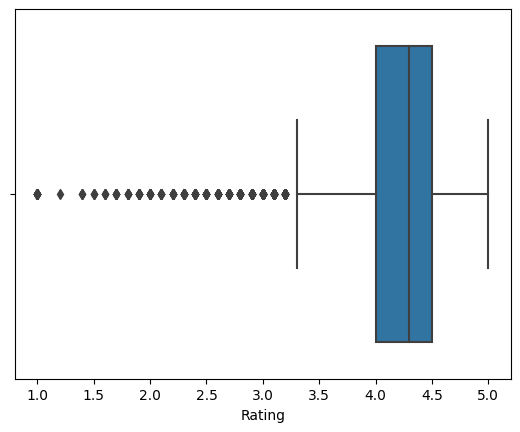

In [76]:
# sns.boxplot gives us the visualization of boxplot
sns.boxplot(x='Rating',data=data_no)                              
plt.show()

Dropping outliers is called 'Trimming'. An outlier will weaken the correlation making the data more scattered.Therefore removing outlier results in stronger correlation since data will be less scattered.

## Univariate Analysis

Univariate analysis is defined as analysis carried out on only one (“uni”) variable (“variate”) to summarize or describe the variable.

## 1.HISTPLOT

<AxesSubplot:xlabel='Rating', ylabel='Count'>

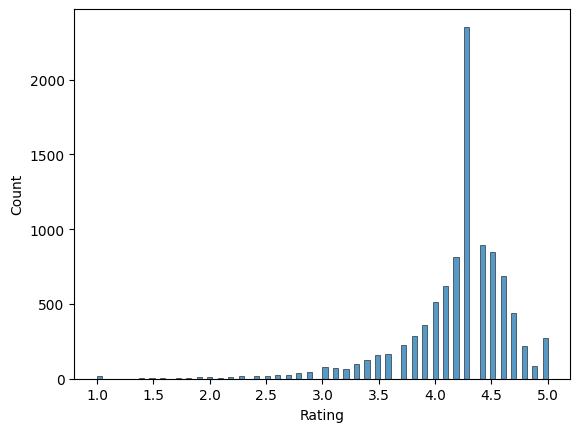

In [78]:
sns.histplot(df['Rating'])

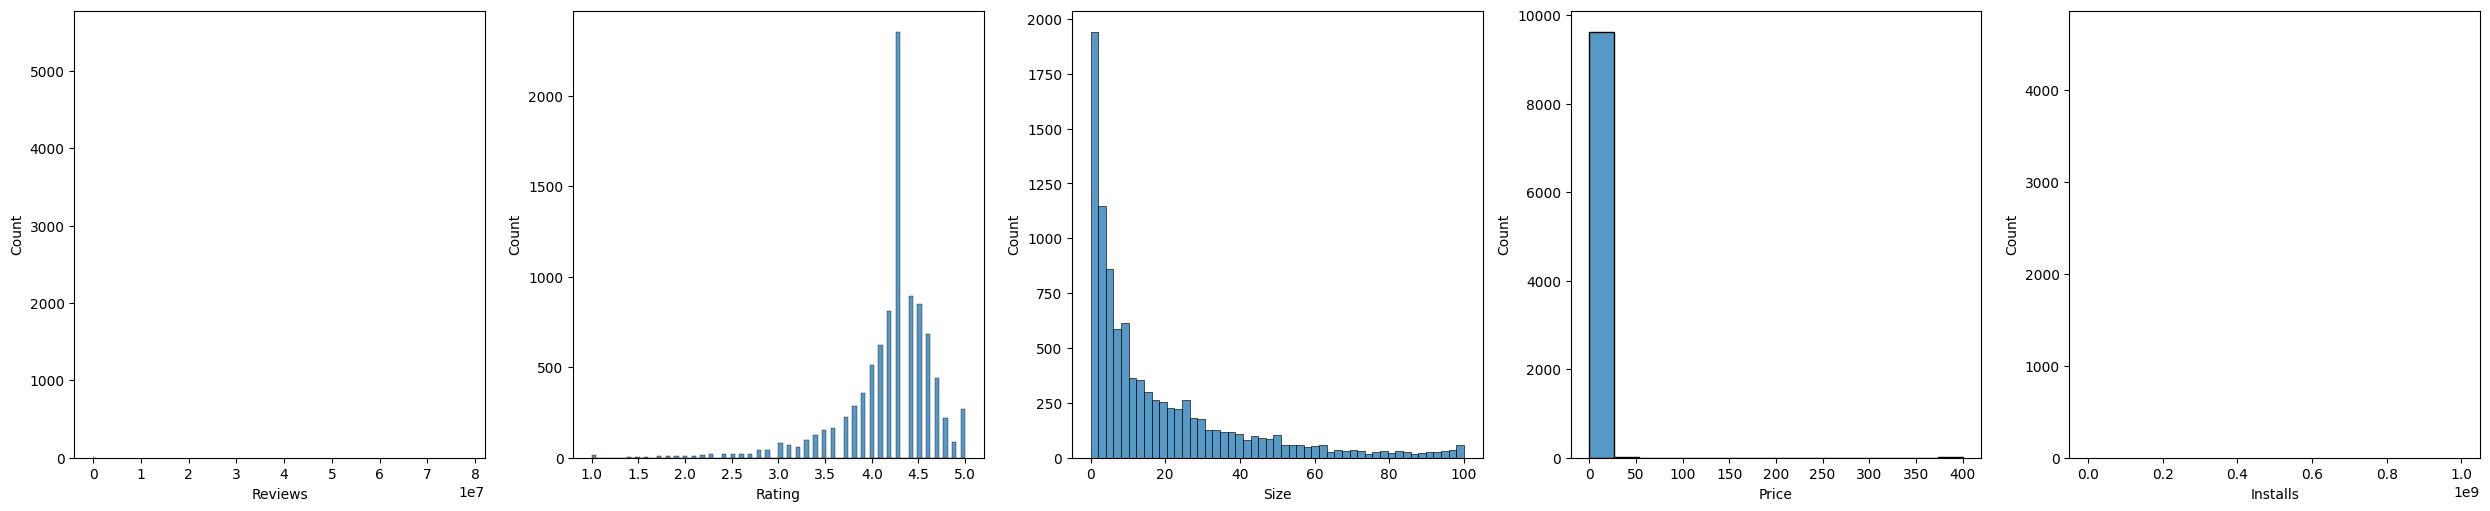

In [79]:
#Importing Matplot library in order to visualise the data in barplot
import matplotlib.pyplot as plt
cols = 5
rows = 5
num_cols = df.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
#for i in num_cols:
 ax=fig.add_subplot(rows,cols,i+1)

 sns.histplot(x = df[col], ax = ax)

fig.tight_layout()
plt.show()
#Here, the numerical columns must be selected in order to visualise the histp
#(i.e, categorical) need to be excluded from the process of importing.

## KDE PLOT

<AxesSubplot:xlabel='Rating', ylabel='Density'>

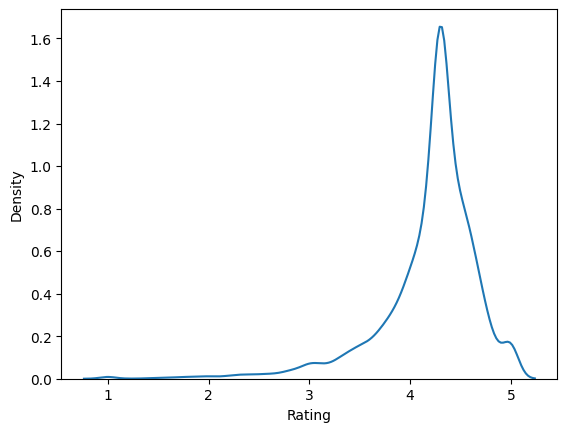

In [80]:
sns.kdeplot(x='Rating',data=df)

This kernel density plot shows us the apps which are having rating of 4 having more density or widely used.

## BOX PLOT

<AxesSubplot:xlabel='Rating'>

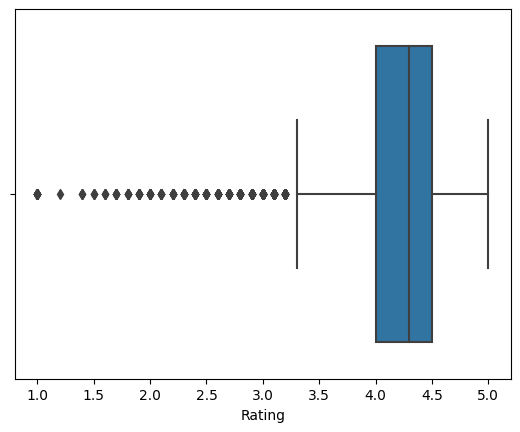

In [81]:
sns.boxplot(x='Rating',data=df)

## VIOLIN PLOT

<AxesSubplot:ylabel='Rating'>

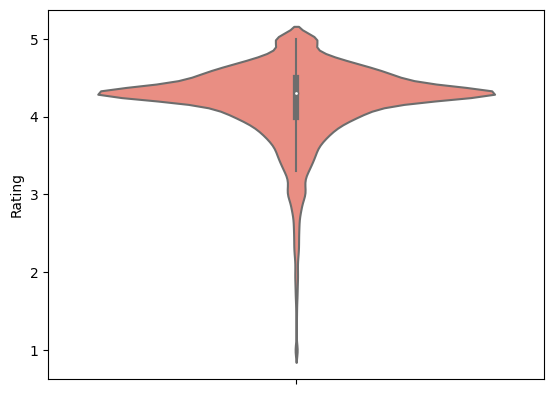

In [82]:
sns.violinplot(y='Rating',data=df,color="salmon")

## Categorical Type Variable

([<matplotlib.patches.Wedge at 0x17622d50790>,
 [Text(-1.0672732839697279, 0.2663226188750642, 'Free'),
  Text(1.0672732777359968, -0.26632264385639814, 'Paid')],
 [Text(-0.5821490639834879, 0.14526688302276228, '92%'),
  Text(0.582149060583271, -0.1452668966489444, '8%')])

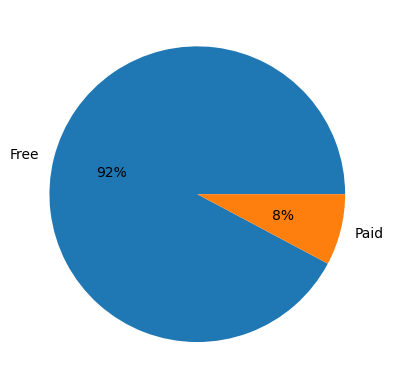

In [85]:
data=df['Type'].value_counts()
plt.pie(data, labels=data.index, autopct="%.0f%%")

This pie chart gives us number of apps which are free and paid.So,there are 92% free apps and 8% paid apps

## Bivariate Analysis
### Numeric- numeric analysis
There are three ways to analyse the numeric- numeric data types simultaneously.

Scatter plot: describes the pattern that how one variable is varying with other variable.

Correlation matrix: to describe the linearity of two numeric variables.

Pair plot: group of scatter plots of all numeric variables in the data frame.

<AxesSubplot:xlabel='Size', ylabel='Rating'>

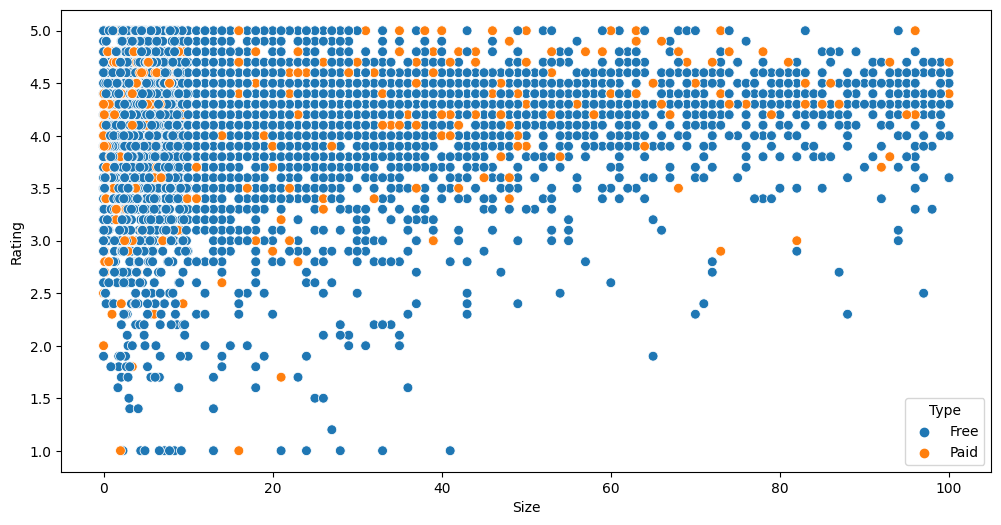

In [89]:
# show the distribution of apps in term of their rating, size and type
plt.figure(figsize=(12, 6))
sns.scatterplot(df['Size'],
               df['Rating'],
               hue=df['Type'],
               s=50)

From this scatter plot, we can imply that majority of the free apps are small in size and having high rating. While for paid apps, we have quite equal distribution in term on size and rating.

### Numerical categorical variable

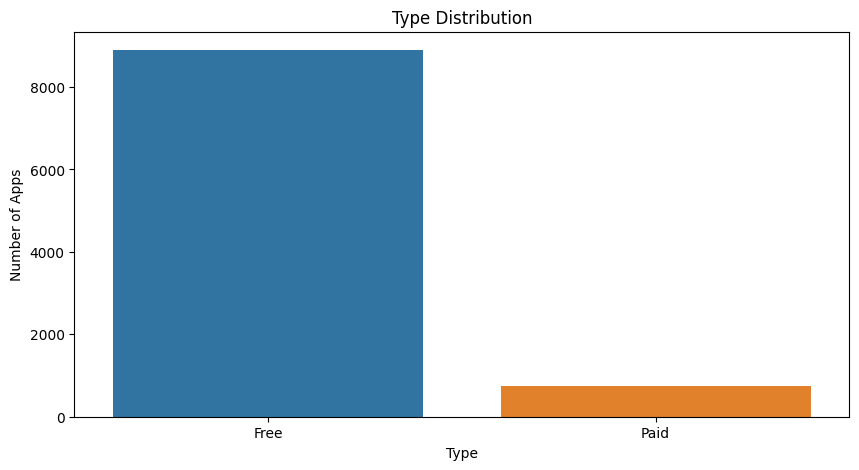

In [91]:
# application type distribution
plt.figure(figsize=(10, 5))
sns.countplot(df['Type'])
plt.title('Type Distribution')
plt.ylabel('Number of Apps')
plt.show()

From the plot we can imply that majority of the apps in the Play Store are Free apps.

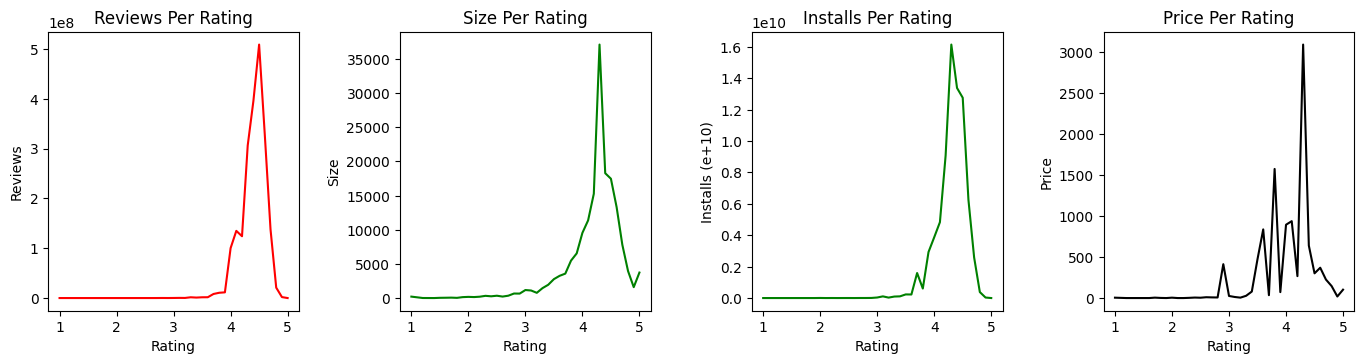

In [92]:
# plot the graphs of reviews, size, installs and price per rating
rating_df = df.groupby('Rating').sum().reset_index()

fig, axes = plt.subplots(1, 4, figsize=(14, 4))

axes[0].plot(rating_df['Rating'], rating_df['Reviews'], 'r')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Reviews')
axes[0].set_title('Reviews Per Rating')

axes[1].plot(rating_df['Rating'], rating_df['Size'], 'g')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Size')
axes[1].set_title('Size Per Rating')

axes[2].plot(rating_df['Rating'], rating_df['Installs'], 'g')
axes[2].set_xlabel('Rating')
axes[2].set_ylabel('Installs (e+10)')
axes[2].set_title('Installs Per Rating')

axes[3].plot(rating_df['Rating'], rating_df['Price'], 'k')
axes[3].set_xlabel('Rating')
axes[3].set_ylabel('Price')
axes[3].set_title('Price Per Rating')

plt.tight_layout(pad=2)
plt.show()

From the above plottings, we can imply that most of the apps with higher rating range of 4.0 - 4.7 are having high amount of reviews, size, and installs. In terms of price, it doesn't reflect a direct relationship with rating, as we could see a fluctuation in term of pricing even at the range of high rating

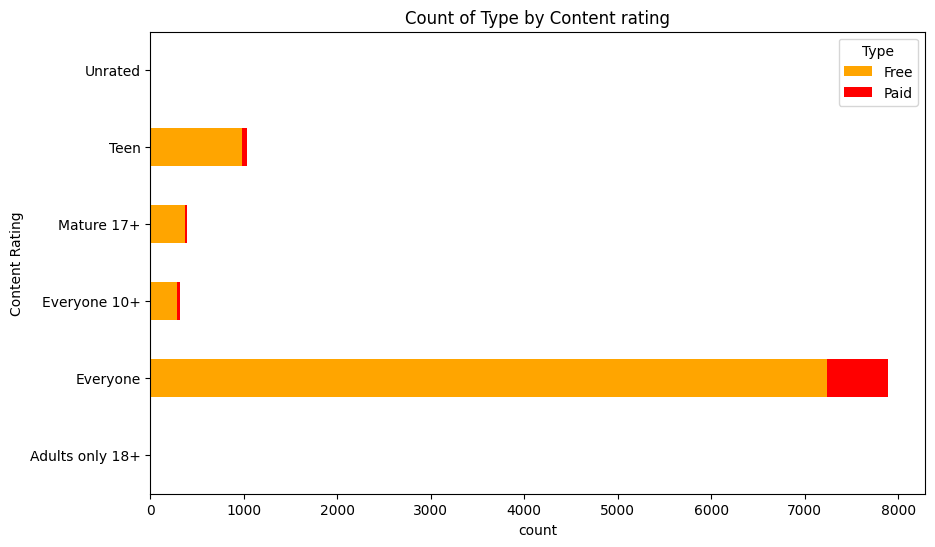

In [99]:
relation= pd.crosstab(df['Content Rating'],df['Type'])
color=['orange', 'red']
ax = relation.plot(kind="barh",figsize=(10,6),stacked=True,color=color)
plt.xticks(rotation=0)
plt.xlabel("count")
plt.title("Count of Type by Content rating")
plt.show()

<AxesSubplot:>

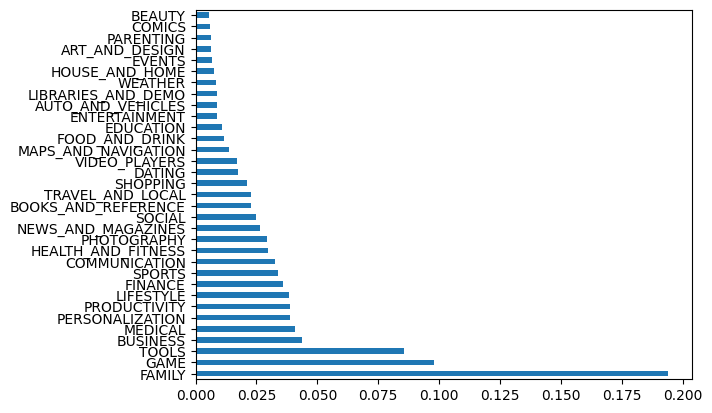

In [94]:
df['Category'].value_counts(normalize=True).plot.barh()

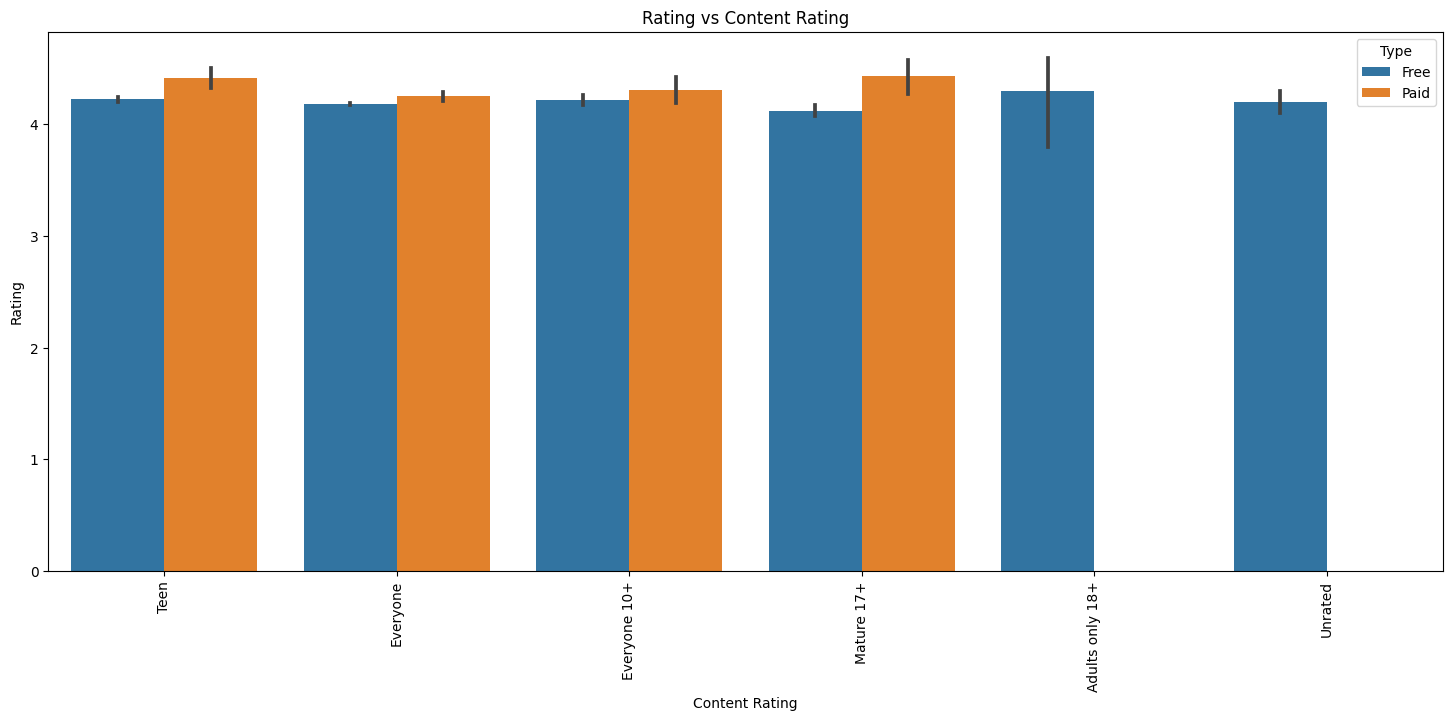

In [101]:
plt.figure(figsize=(18,7))
plt.xticks(rotation=90)
sns.barplot(data =df, y='Rating',hue='Type',x='Content Rating')# In[ ]:
plt.title('Rating vs Content Rating')
plt.show()

## MULTIVARIATE ANALYSIS

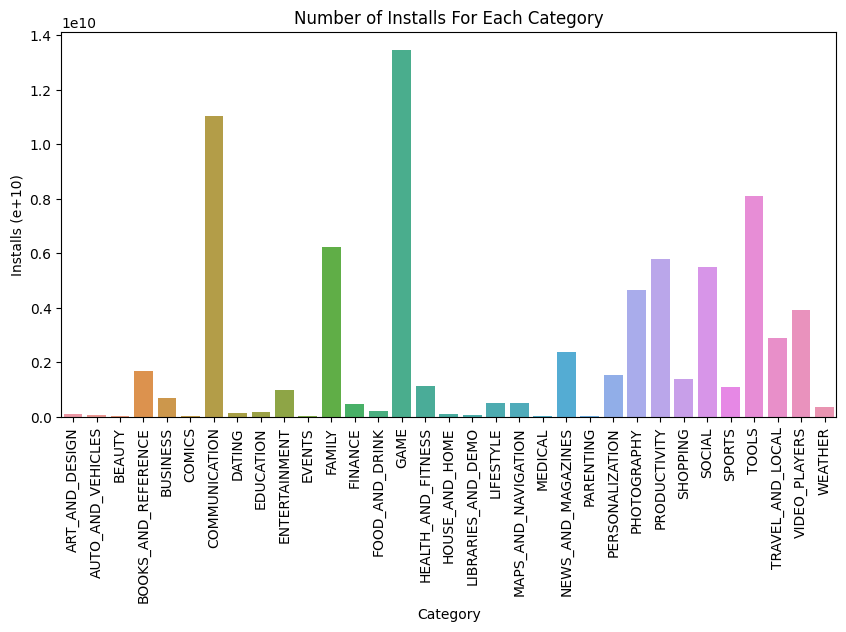

In [93]:
# get the number of installs for each category
categories = df.groupby('Category')
category_installs_sum_df = categories[['Installs']].sum()
category_installs_sum_df = category_installs_sum_df.reset_index()  # to convert groupby object into dataframe

plt.figure(figsize=(10, 5))
sns.barplot(x='Category', y='Installs', data=category_installs_sum_df)
plt.xticks(rotation=90)
plt.ylabel('Installs (e+10)')
plt.title('Number of Installs For Each Category')
plt.show()

From this distribution plotting of number of installs for each category, we can see that most of the apps being downloaded and installed are from the categories of 'Game' and 'Communication'.

### Rating

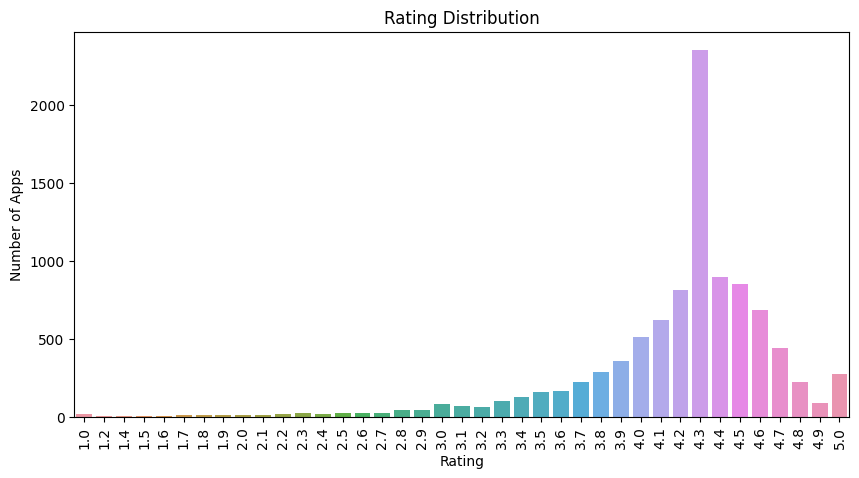

In [97]:
# show the distribution of rating
plt.figure(figsize=(10, 5))
sns.countplot(x='Rating', data=df)
plt.title('Rating Distribution')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

From this distribution plotting, it implies that most of the apps in the Play Store are having rating higher than 4 or in the range of 4 to 4.7.

In [102]:
df.corr()

,Reviews,Rating,Size,Price,Installs
Reviews,1.000000,0.050280,0.037812,-0.007597,0.625051
Rating,0.050280,1.000000,0.027338,-0.018585,0.034393
Size,0.037812,0.027338,1.000000,-0.015033,-0.007803
Price,-0.007597,-0.018585,-0.015033,1.000000,-0.009418
Installs,0.625051,0.034393,-0.007803,-0.009418,1.000000


### HEAT MAP

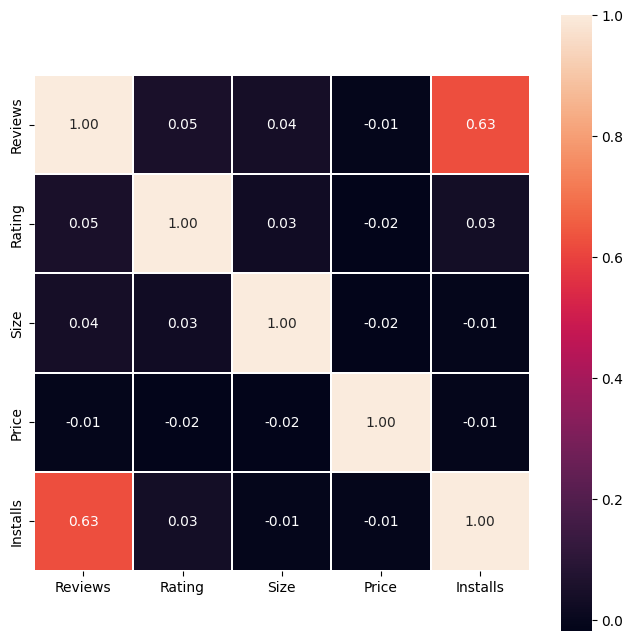

In [104]:
fig, axes = plt.subplots(figsize=(8, 8))
sns.heatmap(df.corr(), ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)
plt.show()

## Conclusion:

The Google Play Store Apps report provides some useful insights regarding the trending of the apps in the play store. As per the graphs visualizations shown above, most of the trending apps (in terms of users' installs) are from the categories like GAME, COMMUNICATION, and TOOL even though the amount of available apps from these categories are twice as much lesser than the category FAMILY. The trending of these apps are most probably due to their nature of being able to entertain or assist the user. Besides, it also shows a good trend where we can see that developers from these categories are focusing on the quality instead of the quantity of the apps.

Other than that, the charts shown above actually implies that most of the apps having good ratings of above 4.0 are mostly confirmed to have high amount of reviews and user installs. There are some spikes in term of size and price but it shouldn't reflect that apps with high rating are mostly big in size and pricy as by looking at the graphs they are most probably are due to some minority. Futhermore, most of the apps that are having high amount of reviews are from the categories of SOCIAL, COMMUNICATION and GAME like Facebook, WhatsApp Messenger, Instagram, Messenger – Text and Video Chat for Free, Clash of Clans etc.

Eventhough apps from the categories like GAME, SOCIAL, COMMUNICATION and TOOL of having the highest amount of installs, rating and reviews are reflecting the current trend of Android users, they are not even appearing as category in the top 5 most expensive apps in the store (which are mostly from FINANCE and LIFESTYLE). As a conclsuion, we learnt that the current trend in the Android market are mostly from these categories which either assisting, communicating or entertaining apps.